In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.model_selection import *
from sklearn import svm
from datetime import datetime
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
sns.set(style="darkgrid")
%matplotlib inline

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df

,id,result,enter,leave,var0,var1,var2,var3
0,0,0,2018-11-02 20:43:36,2018-11-02 20:44:11,22480,1277,75137,"[3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
1,0,0,2018-11-02 20:44:15,2018-11-02 20:45:08,22480,1277,74096,"[1,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
2,0,0,2018-11-06 06:58:06,2018-11-06 06:58:10,25795,461,2618,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
3,0,0,2018-11-06 08:38:29,2018-11-06 08:38:36,20078,3715,32151,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
4,0,0,2018-11-06 08:38:39,2018-11-06 08:39:05,20078,3715,33750,"[0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0..."
5,0,0,2018-11-12 18:00:06,2018-11-12 18:00:36,28600,2644,32150,"[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
6,0,0,2018-11-12 18:00:06,2018-11-12 18:00:37,28600,2644,32150,"[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
7,0,0,2018-11-12 21:50:59,2018-11-12 21:51:04,29203,5170,32150,"[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
8,0,0,2018-11-12 21:51:06,2018-11-12 21:51:23,29203,5170,33750,"[0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0..."
9,0,0,2018-11-12 21:51:24,2018-11-12 21:51:58,29203,5170,34552,"[1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0..."


Посчитаем время в секундах для каждого экземпляра, и добавим это значение к исходному набору данных

In [5]:
sec=[]
for number in  range(df.shape[0]):
    x=datetime.strptime( df.leave[number], "%Y-%m-%d %H:%M:%S" )-datetime.strptime( df.enter[number], "%Y-%m-%d %H:%M:%S" )
    #print (x.seconds)
    sec.append (x.seconds)


In [6]:
df['timeS'] = sec

В переменной var3 находится вектор дополнительный признаков в формате строки. Распарсим эти значение в отдельный дата фрейм, и объединим его с исходным

In [7]:
new=[]
for number in  range(df.shape[0]):
    x=np.fromstring(df.var3[number][1:-1], dtype=int, sep=',')
    new.append (x)

In [8]:
df2=pd.DataFrame(new)
df2.columns=['d1', 'd2', 'd3','d4', 'd5','d6', 'd7', 'd8','d9', 'd10','d11', 'd12', 'd13','d14', 'd15','d16', 'd17', 'd18','d19', 'd20','d21', 'd22', 'd23','d24','d25']

In [9]:
 df3 = pd.concat([df, df2], axis=1)

удалим переменные с заходом и выходом из сайта, а так же var3 и id 

В этом варианте я хочу действовать в лоб, каждую строчку рассматривать как отдельного пользователя

In [10]:
df3=df3.drop('var3',axis=1)
df3=df3.drop('enter',axis=1)
df3=df3.drop('leave',axis=1)
df3=df3.drop('id',axis=1)

In [11]:
df3.head()

,result,var0,var1,var2,timeS,d1,d2,d3,d4,d5,...,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25
0,0,22480,1277,75137,35,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,22480,1277,74096,53,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25795,461,2618,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,20078,3715,32151,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,20078,3715,33750,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Классы несбалансированы, отличаются практически в 10 раз

In [13]:
df3["result"].value_counts()

0    227581
1     25844
Name: result, dtype: int64

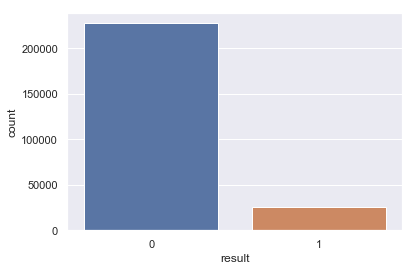

In [15]:
sns.countplot(x="result", data=df3)

Hyperparameter tuning

In [12]:
#Grid Search
GBM = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, subsample= 0.8, max_features=0.8)
param = {'max_depth':[3,5,7,9]}
clf = GridSearchCV(GBM,param,scoring='roc_auc',refit=True,cv=5, n_jobs=-1)
clf.fit(df3.drop('result',axis=1),df3['result'])
print('Best roc_auc: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_))

Best roc_auc: 0.5567, with best C: {'max_depth': 3}


Оценим обобщающую способность градиентного бустинга, с помощью 10 кратной блочной перекрёстной проверки

In [17]:
X = df3.drop('result',axis=1)
y = df3['result']

In [22]:
kf = StratifiedKFold(n_splits=10,shuffle=True)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    GBM = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, subsample= 0.8, max_features=0.8, max_depth=3)
    GBM.fit(xtr,ytr)
    score = roc_auc_score(yvl, GBM.predict_proba(xvl)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    #pred_test = GBM.predict_proba(x_test)[:,1]
   # pred_test_full +=pred_test
    i+=1

1 of KFold 10
ROC AUC score: 0.889080537187108
2 of KFold 10
ROC AUC score: 0.8722350701001182
3 of KFold 10
ROC AUC score: 0.8715988409202674
4 of KFold 10
ROC AUC score: 0.8909087679414878
5 of KFold 10
ROC AUC score: 0.8861097342832118
6 of KFold 10
ROC AUC score: 0.8907867631074243
7 of KFold 10
ROC AUC score: 0.8796200114844112
8 of KFold 10
ROC AUC score: 0.8825890368358204
9 of KFold 10
ROC AUC score: 0.8801283211537629
10 of KFold 10
ROC AUC score: 0.8822251920666416


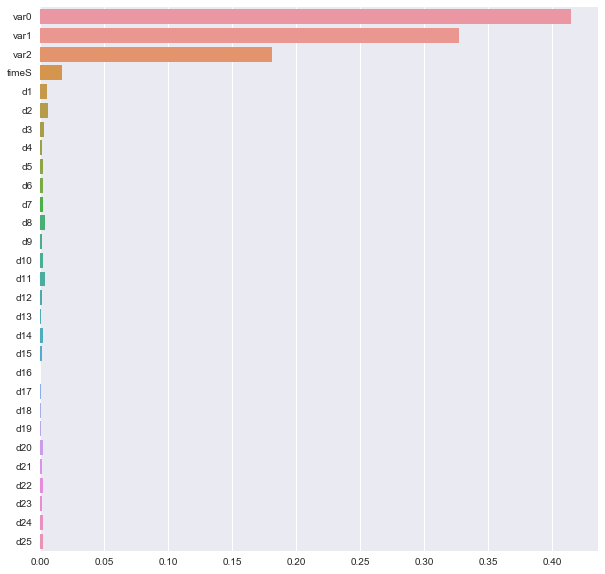

In [23]:
sns.set(rc={'figure.figsize':(10.0,10)})
sns.barplot(x=GBM.feature_importances_, y=list(X_train))

Text(0.5,0,'False positive rate')

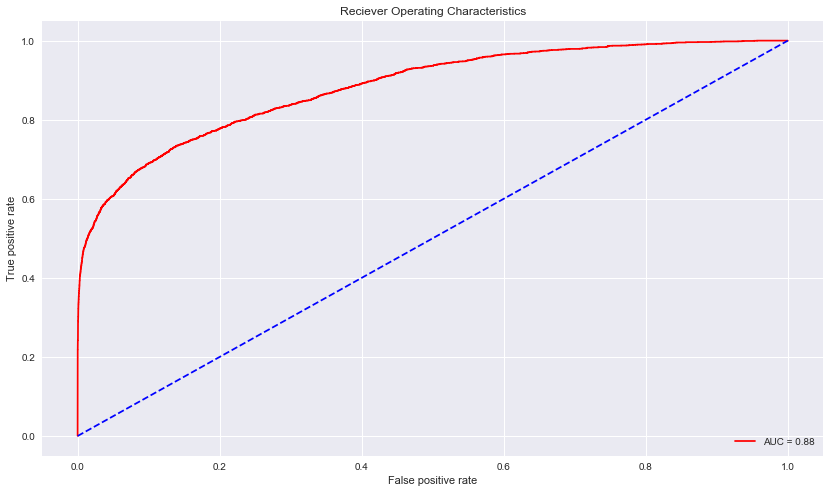

In [24]:
proba = GBM.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')


In [27]:
kf = StratifiedKFold(n_splits=10,shuffle=True)
pred_test_full =0
cv_score_RF =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    RF = RandomForestClassifier(n_estimators=500, max_features=0.8, n_jobs =-1)
    RF.fit(xtr,ytr)
    score = roc_auc_score(yvl, RF.predict_proba(xvl)[:,1])
    print('ROC AUC score:',score)
    cv_score_RF.append(score)    
    #pred_test = GBM.predict_proba(x_test)[:,1]
   # pred_test_full +=pred_test
    i+=1

1 of KFold 10
ROC AUC score: 0.9924757464112015
2 of KFold 10
ROC AUC score: 0.9932439342009601
3 of KFold 10
ROC AUC score: 0.9934629232341703
4 of KFold 10
ROC AUC score: 0.9934489506357617
5 of KFold 10
ROC AUC score: 0.9922664472493871
6 of KFold 10
ROC AUC score: 0.993259123726641
7 of KFold 10
ROC AUC score: 0.9925294361156842
8 of KFold 10
ROC AUC score: 0.9939737875321357
9 of KFold 10
ROC AUC score: 0.9932713757377734
10 of KFold 10
ROC AUC score: 0.9918966592770289


Text(0.5,0,'False positive rate')

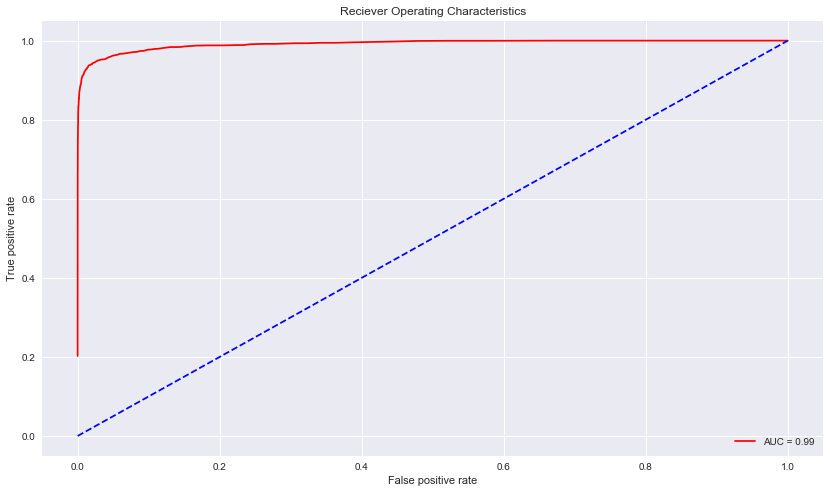

In [30]:
proba = RF.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

Поробуем исключить категорильные признакиб оставить только действия на сайте

In [31]:
df3.head()

,result,var0,var1,var2,timeS,d1,d2,d3,d4,d5,...,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25
0,0,22480,1277,75137,35,3,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,22480,1277,74096,53,1,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,25795,461,2618,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,20078,3715,32151,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,20078,3715,33750,26,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df4=df3
df4=df4.drop('var0',axis=1)
df4=df4.drop('var1',axis=1)
df4=df4.drop('var2',axis=1)
df4=df4.drop('timeS',axis=1)

In [33]:
X = df4.drop('result',axis=1)
y = df4['result']

In [ ]:
При таких признаках, модель не может корректно определить целевого пользователя

In [34]:
kf = StratifiedKFold(n_splits=10,shuffle=True)
pred_test_full =0
cv_score =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    GBM = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1, subsample= 0.8, max_features=0.8, max_depth=3)
    GBM.fit(xtr,ytr)
    score = roc_auc_score(yvl, GBM.predict_proba(xvl)[:,1])
    print('ROC AUC score:',score)
    cv_score.append(score)    
    #pred_test = GBM.predict_proba(x_test)[:,1]
   # pred_test_full +=pred_test
    i+=1

1 of KFold 10
ROC AUC score: 0.5528840377131397
2 of KFold 10
ROC AUC score: 0.5636563706294622
3 of KFold 10
ROC AUC score: 0.5575915914874578
4 of KFold 10
ROC AUC score: 0.5609166534504924
5 of KFold 10
ROC AUC score: 0.5475530395598648
6 of KFold 10
ROC AUC score: 0.5384856330587793
7 of KFold 10
ROC AUC score: 0.5530751255571816
8 of KFold 10
ROC AUC score: 0.551302418541896
9 of KFold 10
ROC AUC score: 0.5641066714334727
10 of KFold 10
ROC AUC score: 0.5642095509162635


Text(0.5,0,'False positive rate')

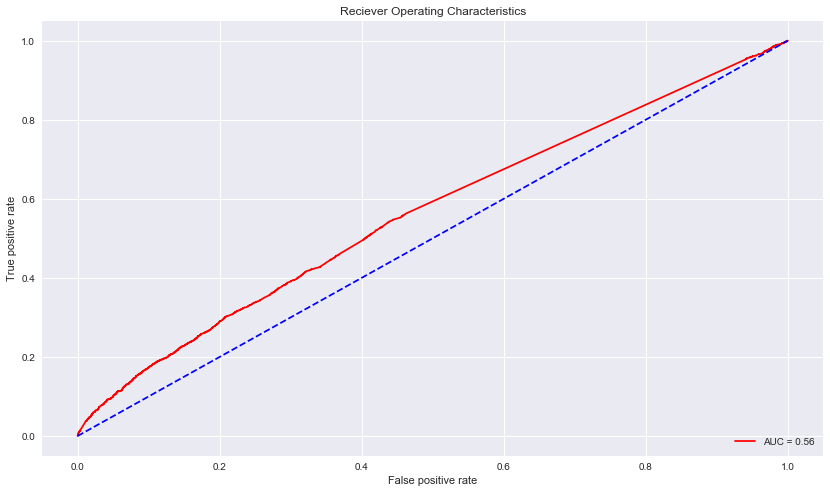

In [35]:
proba = GBM.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [36]:
kf = StratifiedKFold(n_splits=10,shuffle=True)
pred_test_full =0
cv_score_RF =[]
i=1
for train_index,test_index in kf.split(X,y):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = X.loc[train_index],X.loc[test_index]
    ytr,yvl = y.loc[train_index],y.loc[test_index]
    
    #model
    RF = RandomForestClassifier(n_estimators=500, max_features=0.8, n_jobs =-1)
    RF.fit(xtr,ytr)
    score = roc_auc_score(yvl, RF.predict_proba(xvl)[:,1])
    print('ROC AUC score:',score)
    cv_score_RF.append(score)    
    #pred_test = GBM.predict_proba(x_test)[:,1]
   # pred_test_full +=pred_test
    i+=1

1 of KFold 10
ROC AUC score: 0.5869083015429609
2 of KFold 10
ROC AUC score: 0.5986748554252525
3 of KFold 10
ROC AUC score: 0.5842699903772652
4 of KFold 10
ROC AUC score: 0.5858622801546776
5 of KFold 10
ROC AUC score: 0.5796851078394643
6 of KFold 10
ROC AUC score: 0.5904028542883706
7 of KFold 10
ROC AUC score: 0.5760893508818185
8 of KFold 10
ROC AUC score: 0.5818490034600156
9 of KFold 10
ROC AUC score: 0.588094094153126
10 of KFold 10
ROC AUC score: 0.5927945811999019


Text(0.5,0,'False positive rate')

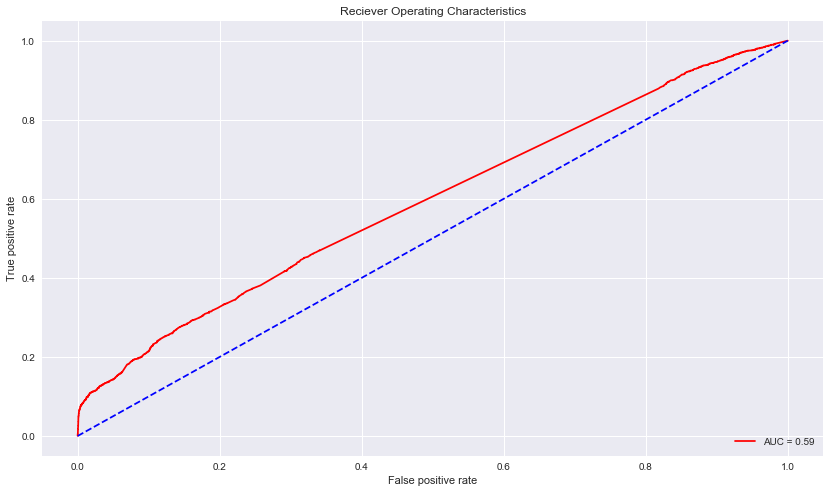

In [37]:
proba = RF.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

Итого максимальный вклад в результат классификации достигается за счёт категориальных переменных.

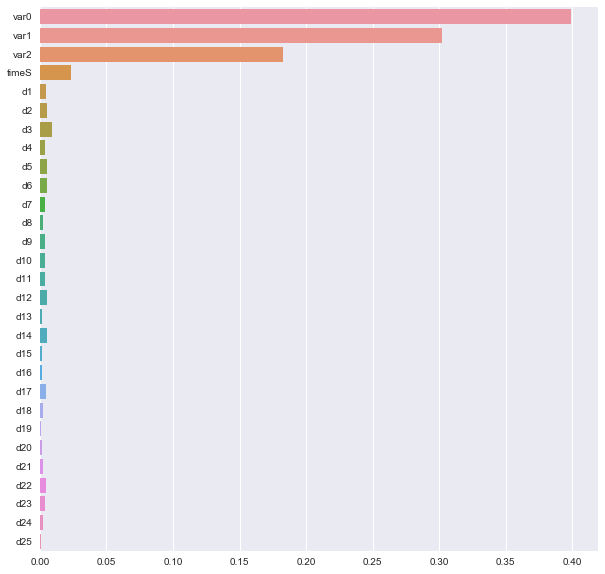

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('result',axis=1), df3['result'], test_size=0.75 , stratify= df3['result'])
GBM = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1)
GBM.fit(X_train, y_train)
preds = GBM.predict_proba(X_test)
#roc_auc_score(y_test, preds)
sns.set(rc={'figure.figsize':(10.0,10)})
sns.barplot(x=GBM.feature_importances_, y=list(X_train))

In [21]:
preds = GBM.predict_proba(X_test)[:,1]
roc_auc_score(y_test, preds)

0.8663976723529451

In [ ]:

proba = lr.predict_proba(xvl)[:,1]
frp,trp, threshold = roc_curve(yvl,proba)
roc_auc_ = auc(frp,trp)

plt.figure(figsize=(14,8))
plt.title('Reciever Operating Characteristics')
plt.plot(frp,trp,'r',label = 'AUC = %0.2f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')



In [23]:
preds

array([0.04000673, 0.13533955, 0.10930325, ..., 0.05659283, 0.19173919,
       0.05653016])

In [114]:
X_train, X_test, y_train, y_test = train_test_split(df3.drop('result',axis=1), df3['result'], test_size=0.75)
GBM = GradientBoostingClassifier(n_estimators=500, learning_rate=0.1)
GBM.fit(X_train, y_train)
preds = GBM.predict_proba(X_test)
#roc_auc_score(y_test, preds)
sns.set(rc={'figure.figsize':(10.0,10)})
sns.barplot(x=GBM.feature_importances_, y=list(X_train))

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [101]:
roc_auc_score(y_test, preds)

0.8758772414240643

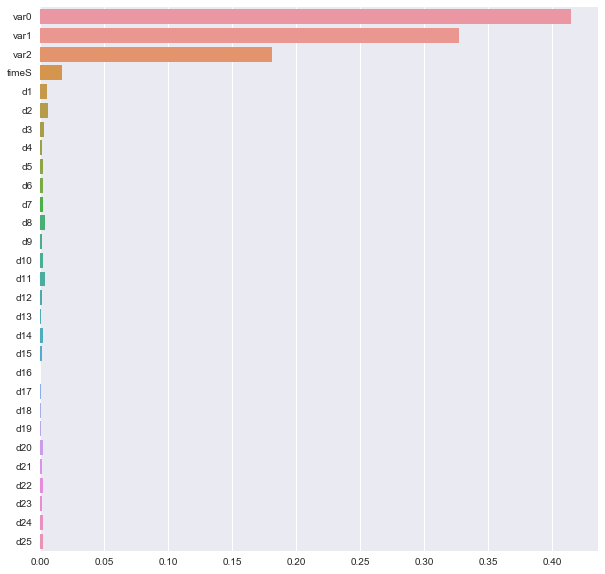

In [28]:

X_train, X_test, y_train, y_test = train_test_split(df3.drop('result',axis=1), df3['result'], test_size=0.9)
rf = RandomForestClassifier(n_estimators=500, max_features=0.8, n_jobs=-1)
rf.fit(X_train, y_train)
preds = rf.predict_proba(X_test)[:,1]
sns.set(rc={'figure.figsize':(10.0,10)})
sns.barplot(x=GBM.feature_importances_, y=list(X_train))

In [29]:
roc_auc_score(y_test, preds)

0.905848132539931

In [41]:
 #sns.distplot(x=preds)
#max(preds)
preds1=preds

In [45]:
for i in range(len(preds1)):
    if i <0.5:
        preds1[i]=0
    else:
        preds1[i]=1

In [46]:
preds1

array([0., 1., 1., ..., 1., 1., 1.])

In [47]:
balanced_accuracy_score(y_test, preds1)

0.5000027472678421

In [55]:
import scikitplot as skplt
import matplotlib.pyplot as plt
skplt.metrics.plot_roc_curve(y_true, preds1)
plt.show()

ModuleNotFoundError: No module named 'scikitplot'

In [48]:
roc_auc_score(y_test, preds)

0.5000027472678421

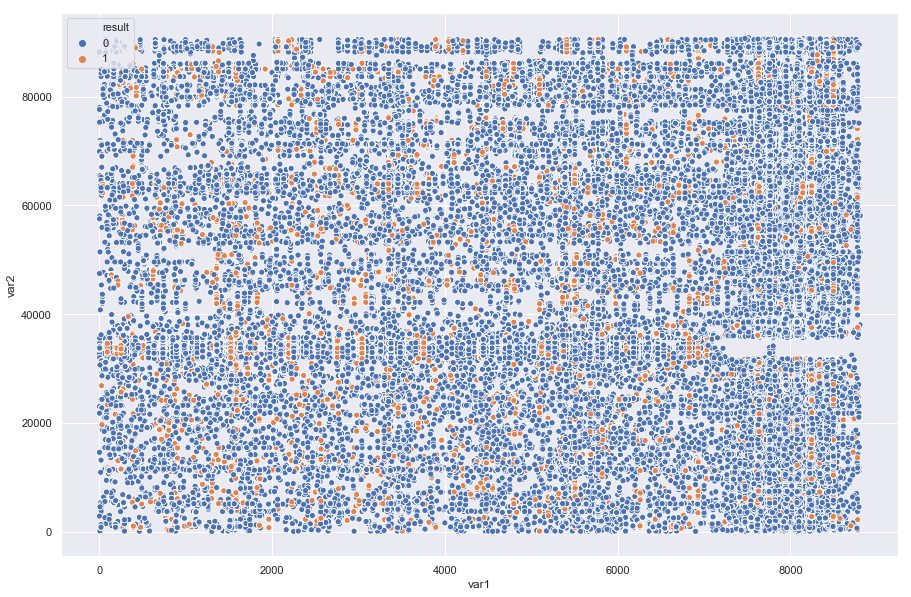

In [52]:
sns.scatterplot(x="var1", y="var2", hue="result",  data=df3)

In [59]:
df3=df3.drop('var3',axis=1)
df3=df3.drop('enter',axis=1)
df3=df3.drop('leave',axis=1)
#df3=df3.drop('id',axis=1)

In [60]:
df3

,id,result,var0,var1,var2,timeS,d1,d2,d3,d4,...,d16,d17,d18,d19,d20,d21,d22,d23,d24,d25
0,0,0,22480,1277,75137,35,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,22480,1277,74096,53,1,2,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,25795,461,2618,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,20078,3715,32151,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,20078,3715,33750,26,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,28600,2644,32150,30,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,28600,2644,32150,31,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,29203,5170,32150,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,29203,5170,33750,17,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,0,0,29203,5170,34552,34,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [65]:
x=df3.groupby(['timeS', 'id']).sum().reset_index()

In [2]:
x=df3[df3.id==0].sum()

NameError: name 'df3' is not defined

In [1]:
x

NameError: name 'x' is not defined